In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)

228818944/228813984 [==============================] - 264s 1us/step


In [8]:
data_dir

'.\\datasets\\flower_photos'

In [9]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

# The dataset has 3670 images

3670

In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

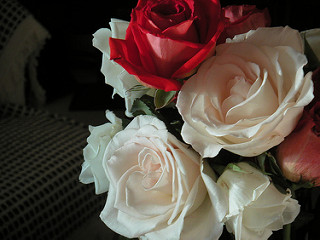

In [75]:
PIL.Image.open(roses[1])

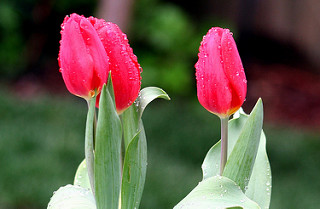

In [77]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0])

In [22]:
# Creating a dictionary with keys as class names and items as list of all the image names for each corresponding class
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [25]:
# Creating a dictionary by  assigning each class a number
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [26]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [29]:
str(flowers_images_dict['roses'][0]) # opencv doesn't accepts windows path so wrap it using str method

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [28]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape  # imread converts an image to numpy array

(240, 179, 3)

In [30]:
# Given images are of different dimensions so resizing all of them into same size

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [35]:
## REsizing each image and labelling it with its corresponding class

X,y = [] , []

for flower_name, images in flowers_images_dict.items():
#     print(flower_name)
#     print(len(images))
    for image in images:
        img = cv2.imread(str(image))   # fetch each image
        resized_img = cv2.resize(img,(180,180)) # resize the fetched image
        X.append(resized_img)  # append image to list 'X'
        y.append(flowers_labels_dict[flower_name]) # append label corresponding to that image to list 'y'

In [36]:
X = np.array(X) # converting X,y into numpy arrays
y = np.array(y)

In [38]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=0)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [39]:
# scaling X_train, X_test
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [42]:
X_train_scaled[0].shape

(180, 180, 3)

# Building a CNN Model

In [49]:
model = Sequential([
        layers.Conv2D(16,3,padding='same',activation = 'relu',input_shape=(180, 180, 3)),
        layers.MaxPooling2D(),
        
        layers.Conv2D(32,3,padding='same',activation = 'relu'),
        layers.MaxPooling2D(),
         
        layers.Conv2D(64,3,padding='same',activation = 'relu'),
        layers.MaxPooling2D(),
        
        layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(5, activation='sigmoid') # % neurons in the output layers since there are 5 classes
        
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train,epochs=20)

Epoch 1/20
86/86 [==============================] - 52s 505ms/step - loss: 1.5291 - accuracy: 0.3704
Epoch 2/20
86/86 [==============================] - 44s 515ms/step - loss: 0.9891 - accuracy: 0.6150
Epoch 3/20
86/86 [==============================] - 44s 509ms/step - loss: 0.7787 - accuracy: 0.7073
Epoch 4/20
86/86 [==============================] - 42s 488ms/step - loss: 0.6035 - accuracy: 0.7761
Epoch 5/20
86/86 [==============================] - 42s 483ms/step - loss: 0.3488 - accuracy: 0.8850
Epoch 6/20
86/86 [==============================] - 42s 485ms/step - loss: 0.2087 - accuracy: 0.9326
Epoch 7/20
86/86 [==============================] - 42s 488ms/step - loss: 0.1069 - accuracy: 0.9696
Epoch 8/20
86/86 [==============================] - 43s 500ms/step - loss: 0.0560 - accuracy: 0.9851
Epoch 9/20
86/86 [==============================] - 44s 507ms/step - loss: 0.0567 - accuracy: 0.9861
Epoch 10/20
86/86 [==============================] - 42s 482ms/step - loss: 0.0214 - accura

In [50]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 5s 125ms/step - loss: 2.6574 - accuracy: 0.6307


[2.6573712825775146, 0.6307189464569092]

In [51]:
predictions = model.predict(X_test_scaled)

In [52]:
predictions[0]

array([9.9933738e-01, 1.0000000e+00, 9.0225220e-01, 1.0937073e-07,
       1.1370100e-07], dtype=float32)

In [53]:
np.argmax(predictions[0]) # predicted label for sample 0 is 1 ( 1 is daisy)

1

In [54]:
y_test[0] # Actual class label of sample 0 is 1

1

Our model is overfitting the training data, we can see that on train data it has an accuracy of 99% 
but on test test the accuracy is only 63%

In [56]:
len(X_train)

2752

In [57]:
len(X_test)

918

In [58]:
## Data augmentation to avoid overfitting

In [69]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1)
])

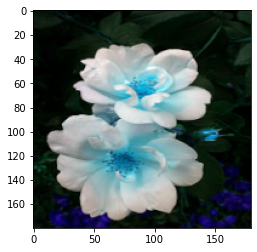

In [67]:
plt.imshow(X[0])

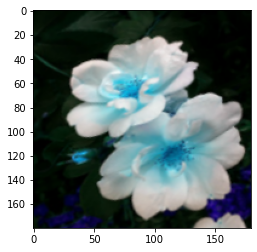

In [70]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [73]:
model = Sequential([
    
        data_augmentation,
    
        layers.Conv2D(16,3,padding='same',activation = 'relu',input_shape=(180, 180, 3)),
        layers.MaxPooling2D(),
        
        layers.Conv2D(32,3,padding='same',activation = 'relu'),
        layers.MaxPooling2D(),
         
        layers.Conv2D(64,3,padding='same',activation = 'relu'),
        layers.MaxPooling2D(),
        
        layers.Dropout(0.2),
    
        layers.Flatten(),
    
        layers.Dense(128, activation = 'relu'),
        layers.Dense(5, activation='sigmoid') # % neurons in the output layers since there are 5 classes
        
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train,epochs=20)

Epoch 1/20
86/86 [==============================] - 75s 585ms/step - loss: 1.6323 - accuracy: 0.3168
Epoch 2/20
86/86 [==============================] - 50s 580ms/step - loss: 1.1330 - accuracy: 0.5414
Epoch 3/20
86/86 [==============================] - 50s 584ms/step - loss: 1.0175 - accuracy: 0.6002
Epoch 4/20
86/86 [==============================] - 50s 584ms/step - loss: 0.9496 - accuracy: 0.6114
Epoch 5/20
86/86 [==============================] - 52s 608ms/step - loss: 0.8701 - accuracy: 0.6651
Epoch 6/20
86/86 [==============================] - 53s 622ms/step - loss: 0.8117 - accuracy: 0.6859
Epoch 7/20
86/86 [==============================] - 53s 615ms/step - loss: 0.8000 - accuracy: 0.6854
Epoch 8/20
86/86 [==============================] - 58s 677ms/step - loss: 0.7281 - accuracy: 0.7154
Epoch 9/20
86/86 [==============================] - 57s 665ms/step - loss: 0.6903 - accuracy: 0.7375
Epoch 10/20
86/86 [==============================] - 59s 685ms/step - loss: 0.6736 - accura

In [74]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 5s 152ms/step - loss: 0.7702 - accuracy: 0.7418


[0.7702358365058899, 0.741830050945282]

In [78]:
# We reduced the overfitting significantly,  now the model is performing better with 74% accuracy on test set